In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import font_manager, rc, cm                ## 폰트를 관리하는 함수와 설정 함수를 사용한다. 

font_path = './font/GmarketSansTTFMedium.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [3]:
df = pd.read_excel('./data/price/평균전세가격_종합.xlsx', engine='openpyxl', header=10)
df.set_index('지 역', inplace=True)
df_price = df.loc[['전국','수도권','지방권']]

ndf = df_price[['2019년 01월','2019년 07월','2020년 01월','2020년 07월','2021년 01월','2021년 07월','2022년 01월']]
display(ndf)

,2019년 01월,2019년 07월,2020년 01월,2020년 07월,2021년 01월,2021년 07월,2022년 01월
지 역,,,,,,,
전국,190358,187382,193470,196901,207643,248136,255434
수도권,260395,255932,265503,270932,284667,357452,368592
지방권,126718,125094,127572,129176,137179,154849,158838


C:\Users\User\AppData\Local\Temp\ipykernel_6272\3595376148.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=ndf.columns, fontsize=11)
C:\Users\User\AppData\Local\Temp\ipykernel_6272\3595376148.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(0,400000,50000), fontsize=11)


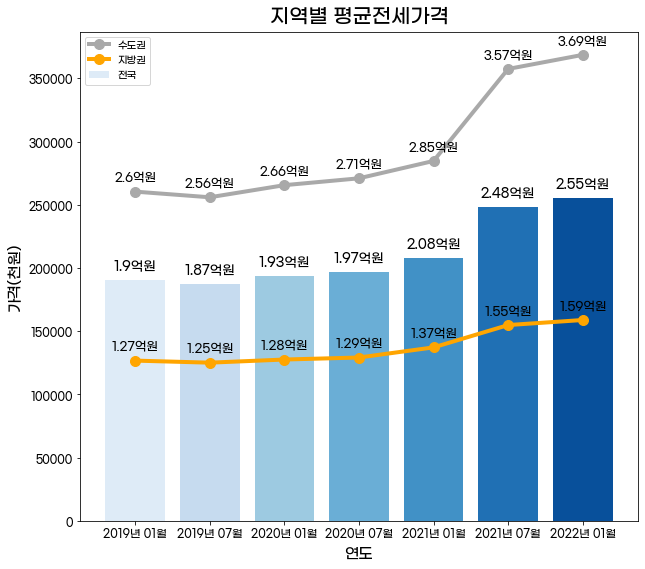

In [7]:
colors = sns.color_palette('Blues',len(ndf.columns))

fig = plt.figure(figsize=(10,9))
fig.set_facecolor('white')
ax = fig.add_subplot()

bar1 = ax.bar(ndf.columns, ndf.loc['전국'], label='전국', color=colors)
bar1 = bar1[0]

line1 = ax.plot(ndf.columns, ndf.loc['수도권'], label='수도권', linewidth=4, color ='darkgrey', marker='o', markersize=10)
line1 = line1[0]

line2 = ax.plot(ndf.columns, ndf.loc['지방권'], label='지방권', linewidth=4, color ='orange', marker='o', markersize=10)
line2 = line2[0]

for coord in list(line1.get_xydata()):
    ax.text(coord[0],coord[1]+9000,f'{round(int(coord[1])/100000,2)}억원',fontsize=12, ha='center')

for coord in list(line2.get_xydata()):
    ax.text(coord[0],coord[1]+9000,f'{round(int(coord[1])/100000,2)}억원',fontsize=12, ha='center')
    
for x,y in enumerate(ndf.loc['전국']):
    ax.text(x,y+9000,f'{round(y/100000,2)}억원',ha='center',fontsize=13)

ax.set_title('지역별 평균전세가격',size=20, pad=10)


ax.set_xticklabels(labels=ndf.columns, fontsize=11)
ax.set_yticklabels(np.arange(0,400000,50000), fontsize=11)
ax.set_xlabel('연도', fontsize = 15)
ax.set_ylabel('가격(천원)', fontsize = 15)
               
ax.legend(loc='best')
plt.savefig('output/지역별_평균전세가격.png')